### Team Member
    Alan Xing ID: 101144347
    Chien-I Chao ID: 101135366
    Nicholas Rasmussen ID: 1839739

GitHub Link : https://github.com/Sup3000gt/Machine-Learning-Project

<center>

### Convolutional Neural Network Project


</center>


In [116]:
# import all libraries

from ucimlrepo import fetch_ucirepo 
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#### Step 1. Loading the Dataset 

In [117]:
# Using the code from ucimlrepo directly load the data

optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

#### Let's look at the data

In [118]:
print(X.shape)

(5620, 64)


In [119]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [120]:
y.head()

,class
0,0
1,0
2,7
3,4
4,6


#### Step 1.1 Normalization

In [121]:
max_pixel_value = X.max()
print("Maximum pixel value:", max_pixel_value)

# seem like the Max value of pixel is 16 instead of 255 like other image, we will normalize data base on this
X_normalized = X / 16.0

Maximum pixel value: Attribute1      0
Attribute2      8
Attribute3     16
Attribute4     16
Attribute5     16
               ..
Attribute60    16
Attribute61    16
Attribute62    16
Attribute63    16
Attribute64    16
Length: 64, dtype: int64


In [122]:
# after Normalization
X_normalized.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0.0,0.0625,0.3750,0.9375,0.7500,0.0625,0.0,0.0,0.0,0.4375,...,0.0000,0.0,0.0,0.0,0.3750,0.8750,0.4375,0.0625,0.0,0.0
1,0.0,0.0000,0.6250,1.0000,0.3750,0.0000,0.0,0.0,0.0,0.4375,...,0.1875,0.0,0.0,0.0,0.6250,1.0000,0.9375,0.1875,0.0,0.0
2,0.0,0.0000,0.5000,0.9375,1.0000,0.8125,0.0,0.0,0.0,0.0625,...,0.0000,0.0,0.0,0.0,0.5625,0.8750,0.0000,0.0000,0.0,0.0
3,0.0,0.0000,0.0000,0.1875,0.6875,1.0000,0.0,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.0000,0.0625,0.9375,0.1250,0.0,0.0
4,0.0,0.0000,0.3125,0.8750,0.2500,0.0000,0.0,0.0,0.0,0.0000,...,0.7500,0.0,0.0,0.0,0.2500,0.7500,0.8750,0.4375,0.0,0.0


#### Step 1.2 Reshape

In [123]:

"""
current shape is 8 x 8 array, (64) we need to reshape it into 2D array
"""
# Data frame do not have reshape, so we will convert into numpy array first
X_np = X_normalized.to_numpy()

X_reshaped = X_np.reshape(-1, 8, 8, 1)  # Reshape to (5620, 8, 8, 1)

print("Reshaped data shape:", X_reshaped.shape)


Reshaped data shape: (5620, 8, 8, 1)


In [124]:
# convert y to numpy array as well
y = y.to_numpy()

#### step 1.3 Split the data 

In [125]:
# Now we are ready to split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [126]:
# Have to do the one-hot encoding, because I keep getting error when I use integer as y value.

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

### Step 2/3/4 CNN Architecture/ Max Pooling/ Softmax

In [127]:
model = Sequential([
    
#     first convolutional layer with Max pooling
#     Kernel size = 32, we add padding, because our image is  8x8.
#     After 2 arounds of pooling, we will have error, so we need padding
#     activation function: relu
#     MaxPooling filter size : 2 x 2
    Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(8, 8, 1), name='conv1'),
    MaxPooling2D((2, 2), name='maxpool1'),
    
    
    # second convolutional layer, with 64 kernel size, else same
    Conv2D(64, (3, 3), activation='relu',padding='same', name='conv2'),
    MaxPooling2D((2, 2), name='maxpool2'),
    
    # third convolutional layer, with 128 kernel size, else same
    Conv2D(128, (3, 3), activation='relu',padding='same', name='conv3'),
    
    # Flatten layer
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation='relu', name='fc1'),
    
    # Apply softmax, we have 10 classes, from 0 - 9
    Dense(10, activation='softmax', name='output')
])

# Compile our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 8, 8, 32)          320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 4, 4, 32)          0         
                                                                 
 conv2 (Conv2D)              (None, 4, 4, 64)          18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 2, 2, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 2, 2, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 fc1 (Dense)                 (None, 128)             

#### Step 5. Training our Model

In [128]:
history = model.fit(
    X_train, y_train_onehot, 
    epochs=10, 
    validation_data=(X_test, y_test_onehot)
)

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.7835 - accuracy: 0.7791 - val_loss: 0.2002 - val_accuracy: 0.9377
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1369 - accuracy: 0.9611 - val_loss: 0.1233 - val_accuracy: 0.9591
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0784 - accuracy: 0.9789 - val_loss: 0.1121 - val_accuracy: 0.9653
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.0770 - val_accuracy: 0.9769
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9820 - val_loss: 0.0681 - val_accuracy: 0.9813
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0847 - val_accuracy: 0.9733
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 

#### Step 5.1 Model Performance
- As we can see above, our model performance is close to 99%, let's see how our training curve looks like

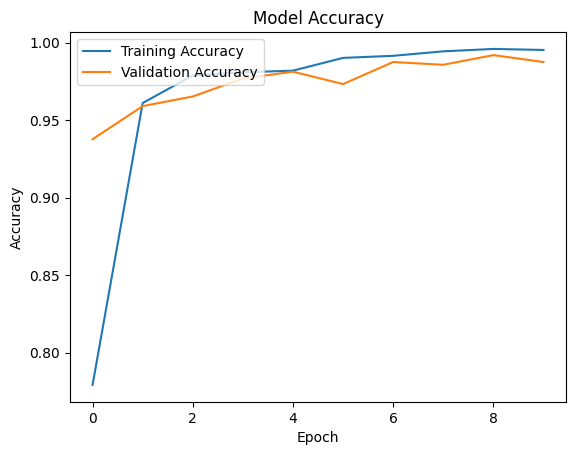

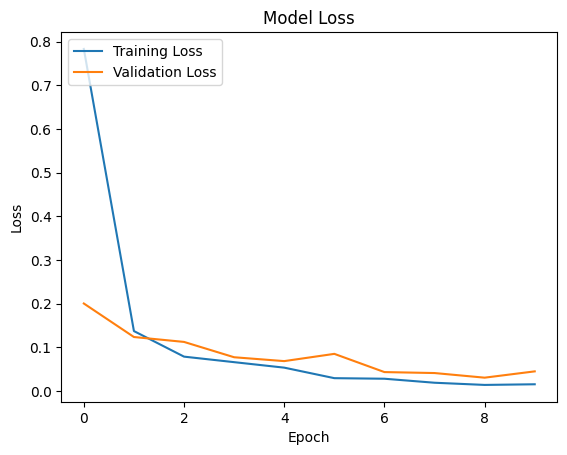

In [129]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


#### Step 5.2 K-Fold cross-validation
- We can see we run 5 fold and all our accuracy is pretty high, some are as high as 100%

In [130]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, to_categorical(y_train, num_classes=10), epochs=10)


Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9915
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0185 - accuracy: 0.9933
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0150 - accuracy: 0.9935
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0085 - accuracy: 0.9976
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 8/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 9/10
141/141 [==============================] - 1s 4ms/step - loss: 9.1194e-04 - accuracy: 0.9998
Epoch 10/10
141/141 [==============================] - 1s 4ms/step - loss: 2.7593e-04 - accuracy

#### Step 5.3 Confusion Matrix and Visualization

36/36 [==============================] - 0s 2ms/step


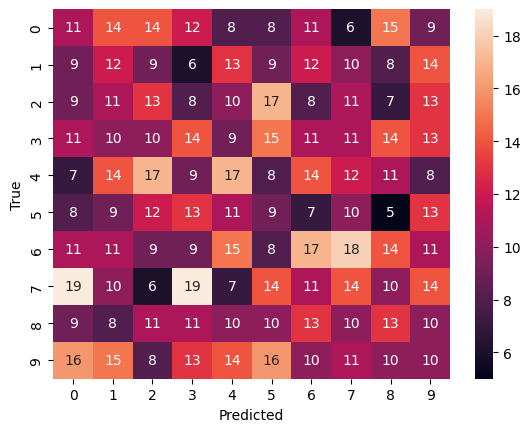

In [131]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_onehot, axis=1)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
